In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [18]:
file_path = ('../final_en.csv')
df = pd.read_csv(file_path)
df

,title,text,lebel
0,Trump backs off praise of Russia's Putin after...,"HENDERSON, Nev. (Reuters) - U.S. Republican pr...",1
1,Trump's funding request for U.S. border wall h...,WASHINGTON (Reuters) - President Donald Trump’...,1
2,"As Votes For Trump Went Up, Canada’s Immigrat...","Well, sad to say, it s a sure chance the next ...",0
3,"U.S. Navy, shipbuilders ready for Trump's expa...","SIMI VALLEY, Calif. (Reuters) - The U.S. arms ...",1
4,"Trump defends DACA move, urges Congress to ena...",WASHINGTON (Reuters) - President Donald Trump ...,1
...,...,...,...
9995,ESTABLISHMENT GOP END TIMES? Why Republican Ca...,"In the real world, if your boss is damaging yo...",0
9996,Republican tax fight complicates plan to pass ...,WASHINGTON (Reuters) - A budget plan crucial t...,1
9997,Nigeria offers to meet militants after ceasefi...,ABUJA (Reuters) - The minister for Nigeria s o...,1
9998,Mike Pence: Trump Is Probably Going To Tortur...,"On Face The Nation, Mike Pence showed exactly ...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10000 non-null  object
 1   text    10000 non-null  object
 2   lebel   10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [4]:
df.describe()

,lebel
count,10000.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [5]:
df['lebel'].value_counts()

lebel
1    5000
0    5000
Name: count, dtype: int64

In [6]:
print('data file nan:')
print(df.isnull().sum())

data file nan:
title    0
text     0
lebel    0
dtype: int64


In [7]:
#data cleaning
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  
    #text = text.lower() 
    return text
    
df['cleaned_text'] = (df['text'].apply(clean_text))
df.drop(columns=['text'], inplace=True)
print(df.head())  

                                               title  lebel  \
0  Trump backs off praise of Russia's Putin after...      1   
1  Trump's funding request for U.S. border wall h...      1   
2   As Votes For Trump Went Up, Canada’s Immigrat...      0   
3  U.S. Navy, shipbuilders ready for Trump's expa...      1   
4  Trump defends DACA move, urges Congress to ena...      1   

                                        cleaned_text  
0  HENDERSON Nev Reuters  US Republican president...  
1  WASHINGTON Reuters  President Donald Trumps ca...  
2  Well sad to say it s a sure chance the next pr...  
3  SIMI VALLEY Calif Reuters  The US arms industr...  
4  WASHINGTON Reuters  President Donald Trump def...  


In [8]:
#data cleaning
def clean_title(title):
    title = re.sub(r'[^\w\s]', '', title)  
    #title = title.lower() 
    return title
    
df['cleaned_title'] = (df['title'].apply(clean_title))
df.drop(columns=['title'], inplace=True)
print(df.head())  

   lebel                                       cleaned_text  \
0      1  HENDERSON Nev Reuters  US Republican president...   
1      1  WASHINGTON Reuters  President Donald Trumps ca...   
2      0  Well sad to say it s a sure chance the next pr...   
3      1  SIMI VALLEY Calif Reuters  The US arms industr...   
4      1  WASHINGTON Reuters  President Donald Trump def...   

                                       cleaned_title  
0  Trump backs off praise of Russias Putin after ...  
1  Trumps funding request for US border wall hits...  
2   As Votes For Trump Went Up Canadas Immigratio...  
3  US Navy shipbuilders ready for Trumps expansio...  
4  Trump defends DACA move urges Congress to enac...  


In [9]:
df

,lebel,cleaned_text,cleaned_title
0,1,HENDERSON Nev Reuters US Republican president...,Trump backs off praise of Russias Putin after ...
1,1,WASHINGTON Reuters President Donald Trumps ca...,Trumps funding request for US border wall hits...
2,0,Well sad to say it s a sure chance the next pr...,As Votes For Trump Went Up Canadas Immigratio...
3,1,SIMI VALLEY Calif Reuters The US arms industr...,US Navy shipbuilders ready for Trumps expansio...
4,1,WASHINGTON Reuters President Donald Trump def...,Trump defends DACA move urges Congress to enac...
...,...,...,...
9995,0,In the real world if your boss is damaging you...,ESTABLISHMENT GOP END TIMES Why Republican Can...
9996,1,WASHINGTON Reuters A budget plan crucial to P...,Republican tax fight complicates plan to pass ...
9997,1,ABUJA Reuters The minister for Nigeria s oilp...,Nigeria offers to meet militants after ceasefi...
9998,0,On Face The Nation Mike Pence showed exactly h...,Mike Pence Trump Is Probably Going To Torture...


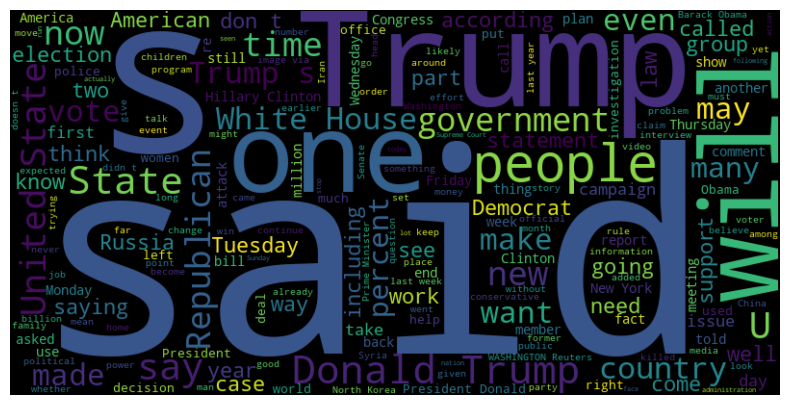

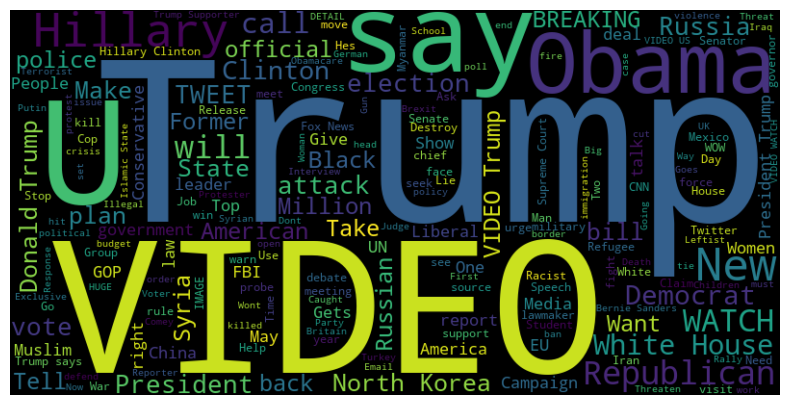

In [10]:
from wordcloud import WordCloud

text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


text = ' '.join(df['cleaned_title'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['lebel']  

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


for name, model in models.items():
    print(f"Training {name}:")
    model.fit(X_train, y_train)  # آموزش مدل
    y_pred = model.predict(X_test)  # پیش‌بینی
    
    
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")


Training Logistic Regression:

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       995
           1       0.98      0.99      0.98      1005

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Accuracy: 0.9835

Training Random Forest:

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       995
           1       0.99      0.99      0.99      1005

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Accuracy: 0.992

Training Support Vector Machine:

Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       995
           1    

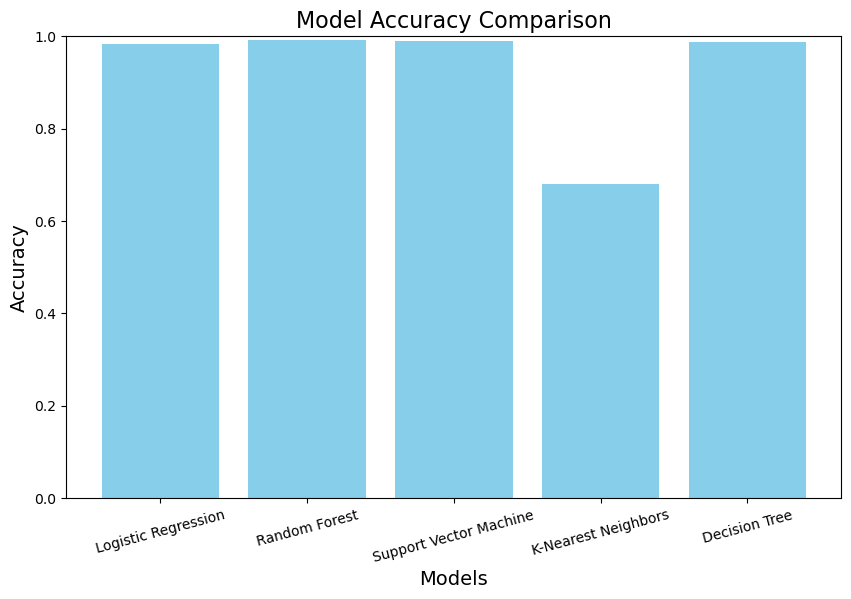

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()}


accuracy_scores = []
model_names = []

for name, model in models.items():
    model.fit(X_train, y_train)  # آموزش مدل
    y_pred = model.predict(X_test)  # پیش‌بینی
    
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    model_names.append(name)


plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xticks(rotation=15)
plt.ylim(0, 1)  # مقدار دقت بین 0 و 1
plt.show()


In [16]:
# انتخاب بهترین مدل
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train) 


RandomForestClassifier(random_state=42)

In [17]:
y_pred_test = best_model.predict(X_test)

# نمایش تعداد نمونه‌های هر نوع پیش‌بینی شده
unique, counts = np.unique(y_pred_test, return_counts=True)
prediction_counts = dict(zip(unique, counts))

print("تعداد پیش‌بینی‌های هر نوع خبر در داده‌های تست:")
for label, count in prediction_counts.items():
    print(f"خبر {'واقعی' if label == 1 else 'جعلی'}: {count}")


تعداد پیش‌بینی‌های هر نوع خبر در داده‌های تست:
خبر جعلی: 993
خبر واقعی: 1007
